In [1]:
#Inicializamos librerías 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

#(Tokenización, POS Tagging, Lematización, NER)
import spacy
import re,string,unicodedata
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

#Inicializamos TextBlob para analizar el sentimiento de un texto, Tokenización: divide el texto en palabras o frases; Etiquetado, identifica las parted del discurso (sustantivos, verbos, adjetivos, etc.)
#La biblioteca TextBlob funciona abstrayendo las complejidades del procesamiento de lenguaje natural, permitiendo a los usuarios realizar tareas comunes de NLP con pocas líneas de código
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os #Biblioteca para interactuar con el sistema OPERATIVO (Windows, macOS, Linux, Unix)de archivos
          #Proporciona funcionalidad independiente del sistema operativo

# Imprimir el directorio de trabajo actual
print("Directorio de trabajo actual:", os.getcwd()) #Ruta de dwirectorio de trabajo actual

# Opcional: Crear el directorio si no existe
# os.makedirs('../input', exist_ok=True)
import warnings #Biblioteca para ignorar todas las advertencias que salgan desde Python
warnings.filterwarnings('ignore') #Limpiar la salida de script

Directorio de trabajo actual: C:\Users\YADER\AppData\Local\Programs\Python\Python311\Scripts\Trabajo\Diciembre 23


In [2]:
# Verificar si el archivo específico existe dentro del Directorio de trabajo actual
archivo = 'IMDB Dataset.csv'
if os.path.isfile(archivo):
    print("El archivo existe.")
else:
    print("El archivo no se encontró en la ruta especificada.")

El archivo existe.


In [3]:
#Importemos los datos de entrenamiento
imdb_data=pd.read_csv('IMDB Dataset.csv')
print(imdb_data.shape)
#Observemos como se encuentran organizados los datos
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
#Estadísticas de la base de datos
imdb_data.describe() #Utilizando (de Pandas) la función describe() 

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
#Contaremos los valores únicos de la columna 'sentiment' del data frame (excuyendo valores NA)
imdb_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

<h5>Preparación de los datos</h5>

In [6]:
#Dividiremos en conjuntos a los datos, uno será para el entrenamiento y el segundo para los datos de prueba 
#Conjunto de datos para entrenamiento
train_reviews=imdb_data.review[:40000] #Tomaremos las primeras 40,000 entradas y nos las devuelve como Series 
train_sentiments=imdb_data.sentiment[:40000]

#Conjunto para prueba
test_reviews=imdb_data.review[40000:] #A partir del índice 40,000 hasta el final
test_sentiments=imdb_data.sentiment[40000:]

#Dimensiones de los conjuntos de entrenamiento y de prueba respectivamente
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


<h7>Dividir textos en tokens, como palabras, es un paso fundamental en el procesamiento del lenguaje natural (NLP) y tiene múltiples aplicaciones y propósitos:

Análisis de Sentimientos: Para determinar si un texto tiene una connotación positiva, negativa o neutral, se analizan los tokens para identificar palabras clave que indican sentimientos.

Clasificación de Textos: Al clasificar textos (por ejemplo, en categorías como spam/no spam, o categorías temáticas), se suelen tokenizar los textos para crear características que los modelos de aprendizaje automático pueden utilizar.

Etiquetado de Partes del Discurso: El etiquetado POS (part-of-speech tagging) involucra asignar partes del discurso (como sustantivos, verbos, adjetivos, etc.) a cada token en un texto, lo cual es útil en muchos análisis lingüísticos.

Análisis Sintáctico: Para comprender la estructura gramatical de las oraciones, es necesario dividir el texto en tokens que luego se analizan para identificar sujetos, verbos, objetos, etc.

Extracción de Entidades: En la extracción de información, se identifican y clasifican entidades nombradas (como nombres de personas, organizaciones, lugares) en el texto. Esto requiere tokenizar el texto para examinar y clasificar cada elemento.

Traducción Automática: Los sistemas de traducción automática, como Google Translate, comienzan por dividir el texto de entrada en tokens para poder procesar y traducir cada parte adecuadamente.

Generación de Texto y Chatbots: Los sistemas de generación de texto (como los chatbots o asistentes virtuales) utilizan la tokenización para entender las consultas de los usuarios y generar respuestas coherentes.

Corrección Ortográfica y Gramatical: Los correctores ortográficos y gramaticales tokenizan el texto para analizar cada palabra y oración, permitiendo identificar y sugerir correcciones.

Búsqueda de Palabras Clave y Recuperación de Información: Para encontrar documentos o fragmentos de texto que contengan ciertas palabras clave, los sistemas de búsqueda primero tokenizan los textos para luego indexar y recuperar la información relevante.

Reducción del Ruido en Textos: En muchos casos, la tokenización ayuda a eliminar elementos no esenciales del texto (como puntuación, palabras de parada) para concentrarse en los elementos más significativos para el análisis.

En resumen, la tokenización es un paso crucial en muchos procesos de NLP y es esencial para convertir el texto crudo en una forma estructurada que los algoritmos y modelos pueden interpretar y proces</h7>ar de manera efectiva.

In [7]:
#Utillizaremos ToktokTokenizer de la biblioteca NLTK, pero se instala por separado porque la instalación básica de NLTK no la incluye
#Tokenization (Dividiremos) el texto en palabras o frases
tokenizer = ToktokTokenizer()
#Lista stopwords utilizando el módulo corpus
stopword_list=nltk.corpus.stopwords.words('english')

<h5>Limpieza y preprocesamiento de datos</h5>

In [8]:
#Desde BeutifulSoup eliminaremos las etiquetas html
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser") #Creamos un objeto BeautifulSoup
    return soup.get_text() #Extraemos el texto sin etiquetas HTML

#Desde re utitaremos un módulo para que el texto que este dentro de corchetes o cuadros '\[[^]]*\]'
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Combinando las funciones anteriores para reducir ruido
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Aplicando la función anterior a la columna 'review'
imdb_data['review']=imdb_data['review'].apply(denoise_text)

In [9]:
#Definiremos una función para limpiar el texto dependiendo de la calificación True o False
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]' #Expresión regex que busca cualquier carácter que no sea letra alfabética (mayús o minús) especificado por ^ que lógicamente implica un No 
    text = re.sub(pattern,'',text) #Si coincide algún caracter de antes, entonces lo susitituye por una cadena vacía''
    return text

#Aplicaremos las funciones
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [10]:
#Separación del texto
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer() #Usando el algoritmo de Porter para extraer los morfemas
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Aplicaremos la función en la columna 'review'
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

In [11]:
#Quitaremos palabras comúnes que no aportan al análisis del texto del dataframe
stop = set(stopwords.words('english')) #Devolverá una lista de palabras convertida en un conjunto
print(stop)

#Eliminando las palabras comunes (stopwords)
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text) #Dividimos el texto  
    tokens = [token.strip() for token in tokens] #Eliminamos espacios en blanco seleccionando lo que queremos en nuestra lista
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
    
#Aplicando la función que crea la nueva lista de datos en la columna 'review'
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'an', 'than', 'how', 'some', 'd', "wasn't", 'themselves', 'below', 're', "she's", 'down', 'in', "mightn't", 'because', 'hers', 'itself', 'to', "you're", 'has', 'mightn', 'only', 'you', "that'll", 'very', 'the', 'its', 'above', 'his', 'both', 'such', 'doing', 'yourselves', 'further', 'can', 'haven', "shouldn't", 'by', 'is', 'but', 'him', 'or', 'them', 'all', 'himself', 'against', "hadn't", 'until', 'being', 'where', 'why', 'didn', 'up', 'which', 'more', 'what', 'whom', "should've", 'will', 'before', "won't", 'wasn', 'after', "aren't", 'your', 'into', 'any', 'these', 'yours', 'once', 'll', 'same', "couldn't", "shan't", 'had', 'does', 'do', 'over', 'that', 'off', 'too', 'wouldn', 'of', 'herself', 'have', 'weren', 'were', 'when', 'during', 'ours', "you've", 'again', 'o', 'no', 'yourself', 'needn', 'and', "you'd", 'their', 'own', 'myself', "it's", 'was', 've', 'not', 'won', 'ma', 'her', 'if', 'don', 'i', 'then', 'out', 'few', 'other', 'am', 'between', 'from', 'should', 's', "didn't", 'isn'

In [12]:
#nNormalización de Reseñas para el entrenamiento
norm_train_reviews=imdb_data.review[:40000] #Primeras 40,0000 filas
norm_train_reviews[0]
#Conversión del dataframe a Cadena si se necesitaara procesar los datos como un solo bloque de texto
#norm_train_string=norm_train_reviews.to_string()
#Corrección ortográfica usando Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()
#Tokenización (Separación del texto) usando TextBlob
#norm_train_words=norm_train_spelling.words
#norm_train_words

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [13]:
#Normalized test reviews
norm_test_reviews=imdb_data.review[40000:] #[40000:] operador de segmentación a partir de la fila 40,000 
norm_test_reviews[45005] #Vemos la review poscionada en la fial 45,005
##Si buscaramos que todo el conjunto de datos se vea como un solo bloque de texto
#norm_test_string=norm_test_reviews.to_string()
#Corrección de ortografía con Textblob
#norm_test_spelling=TextBlob(norm_test_string)
#print(norm_test_spelling.correct())
#Separador de texto con TexBlob
#norm_test_words=norm_test_spelling.words
#norm_test_words

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

In [14]:
#Desde scikit-learn convertiremos texto en tokens
cv = CountVectorizer(min_df = 0.0,max_df=1.0,binary=False,ngram_range=(1,3)) #No excluiremos ningún token
#Reconoceremos los reviews de entrenamiento (haciendo que aprenda el vocabulario) y los transformaremos en un recuento
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#Reconoceremos los reviews de prueba y los transformaremos de manera similar al vocabulario de entrenamiento
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:', cv_train_reviews.shape)
print('BOW_cv_test:', cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names #Esta línea nos devuelve una lista con todos los términos en el vocabulario 

BOW_cv_train: (40000, 6983231)
BOW_cv_test: (10000, 6983231)


In [15]:
#Desde scikit-learn utilizarmos Tfidf ((Term Frequency-Inverse Document Frequency))
tv=TfidfVectorizer(min_df = 0.0,max_df = 1.0,use_idf=True,ngram_range=(1,3)) # No excluiremos ningún dato
#Transformación de datos de entrenamineto a vectores TF-IDF 
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#Transformación de datos de prueba a vectores TF-IDF 
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6983231)
Tfidf_test: (10000, 6983231)


In [16]:
#Clasificaremos los datos, se convertirán en datos binarios
lb=LabelBinarizer()
#Transformando e identificando los datos por medio de etiquetas categóricas
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [17]:
#Separando los datos de prueba y de entrenamiento
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [18]:
#Entrenamiento del modelo
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42) #Utilizando la regulización L2 
#Ajuste del Modelo Fitting the model) | se entrena el modelo 
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Ajuste de modelo (Fitting the model) para la matriz de características tfidf
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [19]:
#Obtendremos los parámetros del modelo y ver el tipo de parámetro a utilizar
print(lr.get_params()) 

{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [20]:
#Predicción del modelo de los datos de prueba
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicción del modelo para TF-IDF
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 1 0 0]


In [21]:
#Presición del modelo
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Preisición del modelo tfidf 
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.8467
lr_tfidf_score : 0.8869


In [22]:
#Informe de Clasificación para Bag of Words
#informe de texto que muestra las principales métricas de clasificación
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report) 

#Informe de Clasificación para TF-IDF
#Informe de clasificación para las predicciones hechas en el conjunto de datos TF-IDF 
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.81      0.90      0.85      4993
    Negative       0.89      0.79      0.84      5007

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

              precision    recall  f1-score   support

    Positive       0.89      0.88      0.89      4993
    Negative       0.88      0.89      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [23]:
#en scikit-learn que calcula la matriz de confusión para evaluar la precisión de una clasificación
#La matriz de confusión es una tabla que se utiliza para describir el rendimiento de un modelo de clasificación. Muestra los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#Matriz de Confusión para TF-IDF
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)
#evaluación detallada del rendimiento del modelo de regresión logística en términos de la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos que produce en dos representaciones de texto diferentes

[[3978 1029]
 [ 504 4489]]
[[4459  548]
 [ 583 4410]]


<h5>clasificar un conjunto de datos de texto.</h5>

In [24]:
#Entrenamiento del SVM Lineal
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#Entrenamiento y ajuste del SVM para Bag of Words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#Entrenamiento y ajuste del SVM para TF-IDF
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


<h5>modelo SVM lineal entrenado para hacer predicciones sobre dos conjuntos de datos de prueba diferentes, uno representado como BoW y el otro como TF-IDF</h5

In [25]:
#Predicción del Modelo para Bag of Words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicción del Modelo para TF-IDF
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

###Estas predicciones son útiles para evaluar el rendimiento del modelo en tareas de clasificación, como clasificar sentimientos positivos o negativos

[0 0 0 ... 0 0 0]
[0 0 0 ... 1 0 0]


In [26]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.8433
svm_tfidf_score : 0.8869


In [27]:
#Informe de Clasificación para Bag of Words
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Informe de Clasificación para TF-IDF
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)
#estos fragmentos de código proporcionan una evaluación detallada del rendimiento del modelo SVM lineal en tareas de clasificación, utilizando dos representaciones de texto diferentes

              precision    recall  f1-score   support

    Positive       0.80      0.91      0.85      4993
    Negative       0.90      0.77      0.83      5007

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

              precision    recall  f1-score   support

    Positive       0.90      0.88      0.89      4993
    Negative       0.88      0.90      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [28]:
#Matriz de Confusión para Bag of Words
# Una matriz de confusión es una tabla que se utiliza para describir el rendimiento de un modelo de clasificación. Muestra la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#Matriz de Confusión para Características TF-IDF
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3878 1129]
 [ 438 4555]]
[[4497  510]
 [ 621 4372]]


In [29]:
#Entrenamiento del modelo
mnb=MultinomialNB()
#Ajuste svm para bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [30]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicción del modelo para características tfidf 
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [31]:
#Precisión y rendimiento del modelo
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Precisión y rendimiento del modelo y características tfidf 
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.8783
mnb_tfidf_score : 0.8892


In [32]:
#Informe de Clasificación para Bag of Words
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Informe de Clasificación para Características TF-IDF
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.85      0.91      0.88      4993
    Negative       0.91      0.84      0.87      5007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

              precision    recall  f1-score   support

    Positive       0.88      0.90      0.89      4993
    Negative       0.90      0.88      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [33]:
#Matriz de Confusión para Bag of Words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#Matriz de Confusión para Características TF-IDF
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4218  789]
 [ 428 4565]]
[[4391  616]
 [ 492 4501]]


<function matplotlib.pyplot.show(close=None, block=None)>

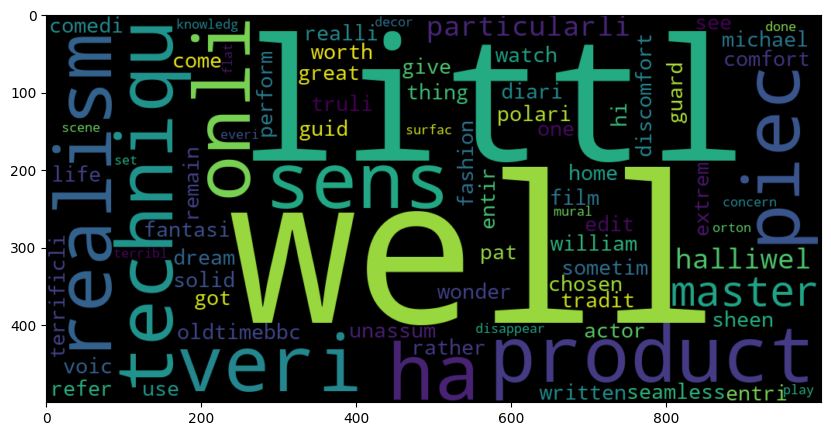

In [34]:
#Nobe de palabras positivas de review 
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

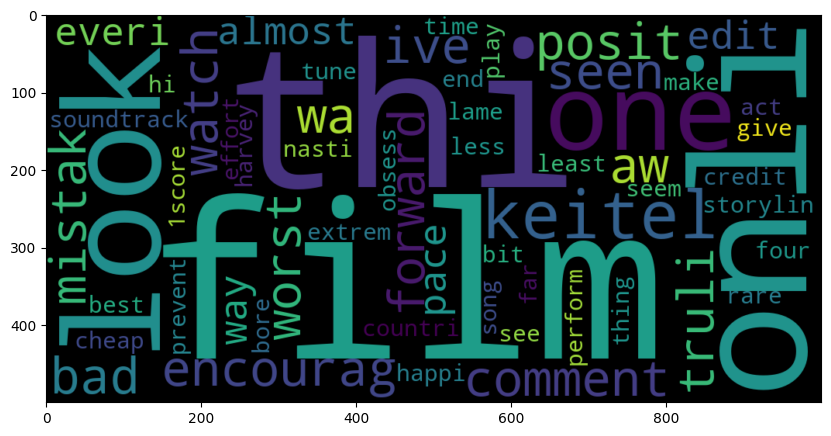

In [35]:
#Nobe de palabras negativas de review 
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show